In [115]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt

In [116]:
df=pd.read_csv("LifeExpect.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### ¿Los diversos factores de predicción elegidos inicialmente afectan realmente a la esperanza de vida? 
### ¿Cuáles son las variables de predicción que realmente afectan la esperanza de vida?

In [118]:
df["Life expectancy "].fillna(df["Life expectancy "].mean(), inplace= True)
df["Adult Mortality"].fillna(df["Adult Mortality"].mean(), inplace= True)
df["infant deaths"].fillna(df["infant deaths"].mean(), inplace= True)

In [119]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [120]:
table1 = df.pivot_table(index= 'Country',values= ("Life expectancy ") , aggfunc =np.sum)
table1

,Life expectancy
Country,
Afghanistan,931.1
Albania,1202.5
Algeria,1177.9
Angola,784.3
Antigua and Barbuda,1200.9
...,...
Venezuela (Bolivarian Republic of),1174.2
Viet Nam,1196.4
Yemen,1021.8


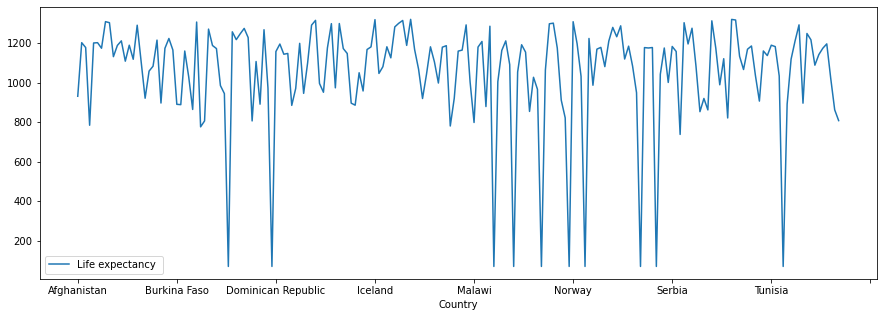

In [121]:
table1.plot(figsize= (15,5))

In [122]:
correlations = df.corr()["Life expectancy "].sort_values()
print("Most positive correlations : \n\n",correlations.tail(8)*100 )
print("Most negative correlations : \n\n",correlations.head(8)*100 )

Most positive correlations : 

 Alcohol                             40.402871
GDP                                 46.139336
Polio                               46.453124
Diphtheria                          47.846456
 BMI                                56.446564
Income composition of resources     72.463087
Schooling                           74.826274
Life expectancy                    100.000000
Name: Life expectancy , dtype: float64
Most negative correlations : 

 Adult Mortality         -69.635931
 HIV/AIDS               -55.645682
 thinness  1-19 years   -47.656080
 thinness 5-9 years     -47.097658
under-five deaths       -22.250302
infant deaths           -19.653500
Measles                 -15.757382
Population               -2.154771
Name: Life expectancy , dtype: float64


## RESPUESTA 1
Negativamente:

thinness 5-9 years, thinness 1-19 years, HIV/AIDS, Adult Mortality
Positivamente:

Schooling, Income composition of resources, GDP, Diphtheria, Polio, BMI, Alchool

### ¿Debería un país con un valor de esperanza de vida inferior (<65)
## aumentar su gasto sanitario para mejorar su esperanza de vida media?

In [125]:
lessThan65 = df.loc[(df['Life expectancy '] < 65)]['Total expenditure'].mean()
greatherThan65 = df.loc[(df['Life expectancy '] >= 65)]['Total expenditure'].mean()

print("Gasto sanitario promedio de los paises que tienen un promedio de vida inferior a 65: %.6f"%(lessThan65))
print("Gasto sanitario promedio de los paises que tienen un promedio de vida superior a 65: %.6f"%(greatherThan65))

Gasto sanitario promedio de los paises que tienen un promedio de vida inferior a 65: 5.349745
Gasto sanitario promedio de los paises que tienen un promedio de vida superior a 65: 6.177045


## RESPUESTA 2
si 
Gasto sanitario promedio de los paises que tienen un promedio de vida inferior a 65: 5.349745
Gasto sanitario promedio de los paises que tienen un promedio de vida superior a 65: 6.177045

### ¿Cómo afectan las tasas de mortalidad de niños y adultos a la esperanza de vida?

                  infant deaths  Adult Mortality  Life expectancy 
infant deaths          1.000000         0.078747         -0.196535
Adult Mortality        0.078747         1.000000         -0.696359
Life expectancy       -0.196535        -0.696359          1.000000


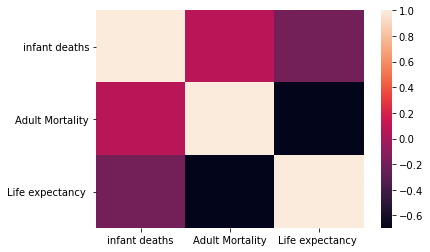

In [123]:
df2=df[["infant deaths","Adult Mortality","Life expectancy "]]
df2
import seaborn as sns
sns.heatmap(df2.corr())
print(df2.corr())

In [126]:
corrMatrix = df.corr()
LIFE_EXPECTANCY_POSS = 1
print("Correlacion entre 'life expectancy' y 'Adult Mortality': %.4f"%(corrMatrix.iloc[LIFE_EXPECTANCY_POSS]["Adult Mortality"]))
print("Correlacion entre 'life expectancy' y 'infant deaths': %.4f"%(corrMatrix.iloc[LIFE_EXPECTANCY_POSS]["infant deaths"]))

Correlacion entre 'life expectancy' y 'Adult Mortality': -0.6964
Correlacion entre 'life expectancy' y 'infant deaths': -0.1965


## RESPUESTA 3
NEGATIVAMENTE 
Correlacion entre 'life expectancy' y 'Adult Mortality': -0.6964
Correlacion entre 'life expectancy' y 'infant deaths': -0.1965

## ¿Tiene la esperanza de vida una correlación positiva o negativa con los hábitos alimenticios, 
## el estilo de vida, el ejercicio, el tabaquismo, el consumo de alcohol, etc.?

In [127]:
corrMatrix = df.corr()
LIFE_EXPECTANCY_POSS = 1
for column in corrMatrix.columns:
    result = "Positiva" if corrMatrix.iloc[LIFE_EXPECTANCY_POSS][column] > 0 else "Negativa"
    print("%s -> %s"%(result,column))

Positiva -> Year
Positiva -> Life expectancy 
Negativa -> Adult Mortality
Negativa -> infant deaths
Positiva -> Alcohol
Positiva -> percentage expenditure
Positiva -> Hepatitis B
Negativa -> Measles 
Positiva ->  BMI 
Negativa -> under-five deaths 
Positiva -> Polio
Positiva -> Total expenditure
Positiva -> Diphtheria 
Negativa ->  HIV/AIDS
Positiva -> GDP
Negativa -> Population
Negativa ->  thinness  1-19 years
Negativa ->  thinness 5-9 years
Positiva -> Income composition of resources
Positiva -> Schooling


## RESPUESTA 4

Positiva -> Year
Positiva -> Life expectancy 
Negativa -> Adult Mortality
Negativa -> infant deaths
Positiva -> Alcohol
Positiva -> percentage expenditure
Positiva -> Hepatitis B
Negativa -> Measles 
Positiva ->  BMI 
Negativa -> under-five deaths 
Positiva -> Polio
Positiva -> Total expenditure
Positiva -> Diphtheria 
Negativa ->  HIV/AIDS
Positiva -> GDP
Negativa -> Population
Negativa ->  thinness  1-19 years
Negativa ->  thinness 5-9 years
Positiva -> Income composition of resources
Positiva -> Schooling

## ¿Cuál es el impacto de la escolarización en la vida útil de los seres humanos?

In [128]:
corrMatrix = df.corr()
LIFE_EXPECTANCY_POSS = 1
print("Correlacion entre 'life expectancy' y 'Schooling': %.4f"%(corrMatrix.iloc[LIFE_EXPECTANCY_POSS]["Schooling"]))

Correlacion entre 'life expectancy' y 'Schooling': 0.7483


## RESPUESTA 5 

Impacto directo Correlacion entre 'life expectancy' y 'Schooling': 0.7483

## ¿Tiene la esperanza de vida una relación positiva o negativa con el consumo de alcohol?

In [129]:
corrMatrix = df.corr()
LIFE_EXPECTANCY_POSS = 1
print("Correlacion entre 'life expectancy' y 'Alcohol': %.4f"%(corrMatrix.iloc[LIFE_EXPECTANCY_POSS]["Alcohol"]))

Correlacion entre 'life expectancy' y 'Alcohol': 0.4040


## RESPUESTA 6

Positiva Correlacion entre 'life expectancy' y 'Alcohol': 0.4040

## ¿Los países densamente poblados tienden a tener una menor esperanza de vida?

In [130]:
corrMatrix = df.corr()
LIFE_EXPECTANCY_POSS = 1
print("Correlacion entre 'life expectancy' y 'Population': %.4f"%(corrMatrix.iloc[LIFE_EXPECTANCY_POSS]["Population"]))

Correlacion entre 'life expectancy' y 'Population': -0.0215


## ESPUESTA 7 

Coorrelacion es baja pero hay
orrelacion entre 'life expectancy' y 'Population': -0.0215, diriamos que si en pequeña medida

## ¿Cuál es el impacto de la cobertura de vacunación en la esperanza de vida?

In [136]:

df4 = df[['Hepatitis B','Measles ',  'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS',"Life expectancy "]]

correlations = df4.corr()["Life expectancy "].sort_values()
print("Most positive correlations : \n\n",correlations.tail(4)*100 )


Most positive correlations : 

 Hepatitis B          25.576041
Polio                46.453124
Diphtheria           47.846456
Life expectancy     100.000000
Name: Life expectancy , dtype: float64


## RESPUESTA 8
IMPACTO POSITIVO
Vemos que la relacion es positiva por la coberturta de cada vacuna Polio, Diphtheria, Hepatitis B como se ve la tabla anterior  Hepatitis B          25.576041
Polio                46.453124
Diphtheria           47.846456
Life expectancy     100.000000